In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv
/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2016 (v3).csv
/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2018 (v5).csv
/kaggle/input/landslide-events/catalog.csv
/kaggle/input/earthquake-database/database.csv
/kaggle/input/building-permit-applications-data/Building_Permits.csv
/kaggle/input/building-permit-applications-data/DataDictionaryBuildingPermit.xlsx
/kaggle/input/volcanic-eruptions/database.csv
/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv


In [2]:
#Reading required building permits data and nfl data

nfl_data = pd.read_csv('/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv')
building_permits = pd.read_csv('/kaggle/input/building-permit-applications-data/Building_Permits.csv')
building_permits

/tmp/ipykernel_20/1441884491.py:3: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv('/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv')
/tmp/ipykernel_20/1441884491.py:4: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  building_permits = pd.read_csv('/kaggle/input/building-permit-applications-data/Building_Permits.csv')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [3]:
#Lets check some data to see what kind of anomalies are there
nfl_data.sample(5)
#AS the output seggests we can see there are lots on NaN feilds with missing data.


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
373980,2017-10-08,2017100802,5,2,1.0,14:32,15,2672.0,28.0,CAR,...,NaN,0.654843,0.345157,0.672153,0.327847,0.654843,0.017311,NaN,NaN,2017
60539,2010-10-24,2010102401,7,2,4.0,14:19,15,2659.0,41.0,MIA,...,NaN,0.623045,0.376955,0.582994,0.417006,0.376955,0.040051,NaN,NaN,2010
12068,2009-10-11,2009101100,12,3,2.0,09:26,10,1466.0,0.0,BAL,...,0.0,0.649765,0.350235,0.616641,0.383359,0.649765,-0.033124,-0.033124,0.0,2009
309308,2015-12-20,2015122004,15,3,2.0,06:32,7,1292.0,36.0,IND,...,NaN,0.616844,0.383156,0.637174,0.362826,0.383156,-0.020330,NaN,NaN,2015
21644,2009-11-08,2009110808,10,2,4.0,03:05,4,1985.0,6.0,DET,...,NaN,0.245666,0.754334,0.259258,0.740742,0.245666,0.013592,NaN,NaN,2009


In [4]:
building_permits.sample(5)
#same case for the other data set as well


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
60048,201403100322,3,additions alterations or repairs,03/10/2014,7331,100,71,NaN,Summit,Wy,...,NaN,NaN,5.0,wood frame (5),NaN,7.0,Lakeshore,94132.0,"(37.7149443438772, -122.474885859236)",1354491498352
31318,M444367,8,otc alterations permit,11/15/2013,0961,018,2655,NaN,Broadway,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,Pacific Heights,94115.0,"(37.79331764412186, -122.44056166500009)",132441785452
121088,201604154906,8,otc alterations permit,04/15/2016,0040,017,295,NaN,Bay,St,...,2.0,constr type 2,2.0,constr type 2,NaN,3.0,North Beach,94133.0,"(37.80554675030717, -122.41161383120416)",141983656448
92667,201507201968,8,otc alterations permit,07/20/2015,3764,177,461,NaN,02nd,St,...,1.0,constr type 1,1.0,constr type 1,NaN,6.0,Financial District/South Beach,94107.0,"(37.78369951313747, -122.3935804462373)",1389064166776
135889,201609076991,8,otc alterations permit,09/07/2016,6497,003,408,NaN,Pope,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Excelsior,94112.0,"(37.709757193501524, -122.43973486260124)",1436438205118


In [5]:
#lets clean the building_permits datast first
#finding number of missing data peer column
missing_values_count = building_permits.isnull().sum()

print(missing_values_count)

#total missing values
missing_values_count.sum()



Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

2245941

In [6]:
#lets try removing the nan's directly and check whats left

building_permits.dropna()

#since each row had at least one NaN value all the data was removed. so this wont work. Trying alternatives



,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [7]:
#lets try removing columns with NaNs instead
columns_with_nan_dropped = building_permits.dropna(axis = 1)
columns_with_nan_dropped.head()

#here we can see there are data left. But still we removed much more data , which may be important data


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [8]:
#lets check how much data was lost
print(f"Original columns = {building_permits.shape[1]} ")
print(f"Dropped columns = {columns_with_nan_dropped.shape[1]} ")

#At this point even if we lost some data , our dataset in hand have no NaN's

Original columns = 43 
Dropped columns = 12 


In [9]:
#Another option than dropping the columns could be adding the missing values automatically
#lets take a small subset and try that

subset_data = building_permits.loc[:,'Street Number Suffix':'Issued Date']
subset_data.head()

,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date
0,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015
1,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017
2,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN
3,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017
4,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017


In [10]:
#using pandas to fill Na's with 0(This could be an alternative)
subset_data.fillna(0)


,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date
0,0,Ellis,St,0.0,0,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015
1,0,Geary,St,0.0,0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017
2,0,Pacific,Av,0.0,0,installation of separating wall,withdrawn,09/26/2017,05/27/2016,0
3,0,Pacific,Av,0.0,0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017
4,0,Market,St,0.0,0,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017
...,...,...,...,...,...,...,...,...,...,...
198895,0,Montgomery,St,0.0,0,street space,issued,12/05/2017,12/05/2017,12/05/2017
198896,0,Bush,St,0.0,0,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017
198897,0,Indiana,St,0.0,0,street space,issued,12/06/2017,12/06/2017,12/06/2017
198898,0,Sutter,St,0.0,0,street space permit,issued,12/06/2017,12/06/2017,12/06/2017


In [11]:
#or we can try filling Na's with the value that comes right after it in the same column
#then replace remaining na,s with 0
subset_data.fillna(method = 'bfill',axis = 0).fillna(0)

#This method is useful if there is a logical order in the data that makes some sense


,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date
0,A,Ellis,St,0.0,A,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015
1,A,Geary,St,0.0,A,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017
2,A,Pacific,Av,0.0,A,installation of separating wall,withdrawn,09/26/2017,05/27/2016,07/18/2017
3,A,Pacific,Av,0.0,A,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017
4,A,Market,St,0.0,A,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017
...,...,...,...,...,...,...,...,...,...,...
198895,0,Montgomery,St,0.0,0,street space,issued,12/05/2017,12/05/2017,12/05/2017
198896,0,Bush,St,0.0,0,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017
198897,0,Indiana,St,0.0,0,street space,issued,12/06/2017,12/06/2017,12/06/2017
198898,0,Sutter,St,0.0,0,street space permit,issued,12/06/2017,12/06/2017,12/06/2017


In [12]:
#Scale and normalize Data

#step 1 : Setting the environment

#loading required modules
import numpy as np

#for minmax scaling
from mlxtend.preprocessing import minmax_scaling

#FOR transformation
from scipy import stats

#plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


#Reading required data: For this task we will use the kickstarter-projects data for 2018
data = pd.read_csv('/kaggle/input/kickstarter-projects/ks-projects-201801.csv')
data.head()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Original [0.37770898 0.21507069 1.22302043 0.32027399 2.82495146 0.52129698
 0.76720181 0.61333929 1.76880752 0.82575814]
Scaled [0.05655683 0.03219932 0.1831548  0.04795508 0.42306782 0.07806127
 0.11488918 0.09184597 0.26489454 0.12365886]


/tmp/ipykernel_20/519521757.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_data, ax =ax[0])
/tmp/ipykernel_20/519521757.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax =ax[1])


Text(0.5, 1.0, 'Scaled Data')

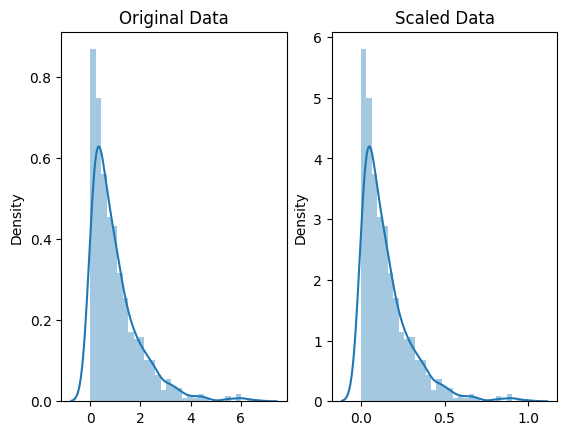

In [13]:
#Difference between scaling and normalization is that in scaling we are changing the range of the data
#but in normalization we are chaiging the shape of the distribution of the data

#Scaling 

#generating 1000 data points randonly drawn from an exponential distribution

sample_data = np.random.exponential(size=1000)
print(f'Original {sample_data[0:10]}')

#minmax scaling the data between 0-1
scaled_data = minmax_scaling(sample_data,columns = 0)

print(f'Scaled {scaled_data[0:10]}')

#plotting both data to compare
fig, ax = plt.subplots(1,2)
sns.distplot(sample_data, ax =ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax =ax[1])
ax[1].set_title('Scaled Data')


/tmp/ipykernel_20/735429452.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_data, ax =ax[0])
/tmp/ipykernel_20/735429452.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax =ax[1])


Text(0.5, 1.0, 'Normalized Data')

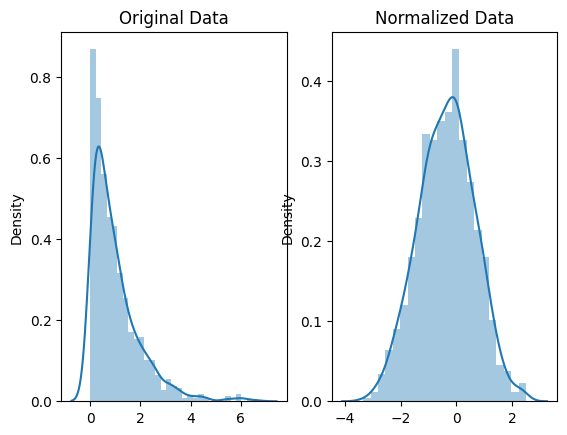

In [14]:
#NOrmalization: The point of normalization is to change the observations so that they can be described as a normal distribution.
#Normal distribution is also called Gaussian Distribution

#here we will use box-cox transformation for normalization

normalized_data = stats.boxcox(sample_data)

#plotting normalized data

fig, ax = plt.subplots(1,2)
sns.distplot(sample_data, ax =ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_data[0], ax =ax[1])
ax[1].set_title('Normalized Data')

/opt/conda/lib/python3.10/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
/tmp/ipykernel_20/2663029624.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(usd_goal, ax =ax[0])
/tmp/ipykernel_20/2663029624.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-le

Text(0.5, 1.0, 'Scaled Data')

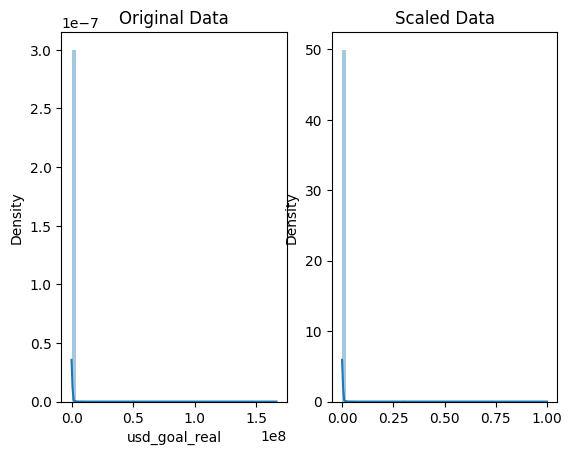

In [15]:
#using the data kickstart to perform scaling
usd_goal =  data.usd_goal_real

#scaling from 0-1
scaled_data = minmax_scaling(usd_goal,columns = [0])

#plotting scaled data

fig, ax = plt.subplots(1,2)
sns.distplot(usd_goal, ax =ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax =ax[1])
ax[1].set_title('Scaled Data')

/tmp/ipykernel_20/3072468288.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_pledges, ax =ax[0])
/tmp/ipykernel_20/3072468288.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_pledges, ax =ax[1])


Text(0.5, 1.0, 'Normalized Data')

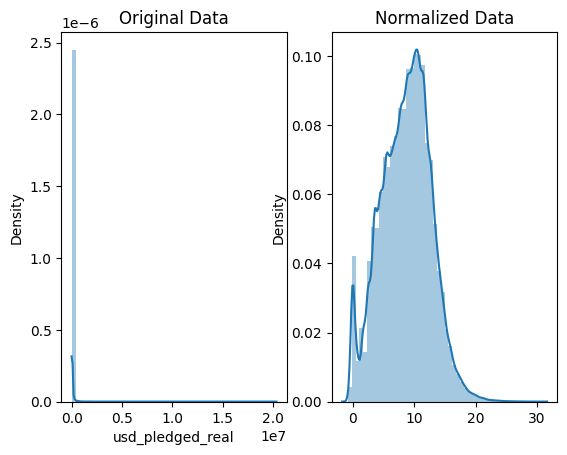

In [16]:
#Normalization

#getting positive indices for box cox
positive_pledges_index = data.usd_pledged_real >0

#getting positive pledges
positive_pledges = data.usd_pledged_real[positive_pledges_index]

#normalizing pledges
normalized_pledges = stats.boxcox(positive_pledges)[0]

#plotting normalized data

fig, ax = plt.subplots(1,2)
sns.distplot(positive_pledges, ax =ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_pledges, ax =ax[1])
ax[1].set_title('Normalized Data')

In [17]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [18]:
#Parsing Dates

#importing module for date time
import datetime

#reading data
#We are using earthquake and landslides records between different dates

earthquakes = pd.read_csv('/kaggle/input/earthquake-database/database.csv')
landslides = pd.read_csv('/kaggle/input/landslide-events/catalog.csv') 
volcanos = pd.read_csv('/kaggle/input/volcanic-eruptions/database.csv')

#Checking if there is date column or not 
landslides['date']

0        3/2/07
1       3/22/07
2        4/6/07
3       4/14/07
4       4/15/07
         ...   
1688    12/7/15
1689    2/22/16
1690    2/23/16
1691    2/26/16
1692     3/2/16
Name: date, Length: 1693, dtype: object

In [19]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [20]:
volcanos.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [21]:
#CHecking the data type of the date column
landslides['date'].dtype

#here we can see that the datatype is shown as Object. So we need to make it as date so that the interpreter understands it as date

#adding a new column with parsed date and time 
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")


In [22]:
#lets see the added column
landslides['date_parsed'].head()

#we can see the datatype shown inn the output is date time

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [23]:
#Second case where there are multiple date formats in single column
earthquakes['Date']

0        01/02/1965
1        01/04/1965
2        01/05/1965
3        01/08/1965
4        01/09/1965
            ...    
23407    12/28/2016
23408    12/28/2016
23409    12/28/2016
23410    12/29/2016
23411    12/30/2016
Name: Date, Length: 23412, dtype: object

In [24]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format = True , format = "%m/%d/%y")
earthquakes['date_parsed']

0        1965-01-02 00:00:00
1        1965-01-04 00:00:00
2        1965-01-05 00:00:00
3        1965-01-08 00:00:00
4        1965-01-09 00:00:00
                ...         
23407    2016-12-28 00:00:00
23408    2016-12-28 00:00:00
23409    2016-12-28 00:00:00
23410    2016-12-29 00:00:00
23411    2016-12-30 00:00:00
Name: date_parsed, Length: 23412, dtype: object

In [25]:
#getting day of earthquakes

day_of_landslides = landslides['date_parsed'].dt.day

day_of_landslides

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

/tmp/ipykernel_20/4057905327.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_landslides,kde = False,bins = 31)


<AxesSubplot: xlabel='date_parsed'>

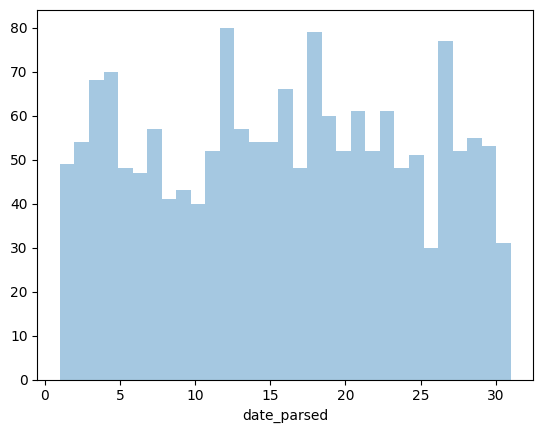

In [26]:
#plottting the days of the month
sns.distplot(day_of_landslides,kde = False,bins = 31)

In [27]:
#trying same for earthquake

print(earthquakes['date_parsed'].head)
 #since the datatype is still object lets parse it again
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['date_parsed'],utc = True)

earthquakes['date_parsed'].head
#now we wan see the dtype is changed

<bound method NDFrame.head of 0        1965-01-02 00:00:00
1        1965-01-04 00:00:00
2        1965-01-05 00:00:00
3        1965-01-08 00:00:00
4        1965-01-09 00:00:00
                ...         
23407    2016-12-28 00:00:00
23408    2016-12-28 00:00:00
23409    2016-12-28 00:00:00
23410    2016-12-29 00:00:00
23411    2016-12-30 00:00:00
Name: date_parsed, Length: 23412, dtype: object>


<bound method NDFrame.head of 0       1965-01-02 00:00:00+00:00
1       1965-01-04 00:00:00+00:00
2       1965-01-05 00:00:00+00:00
3       1965-01-08 00:00:00+00:00
4       1965-01-09 00:00:00+00:00
                   ...           
23407   2016-12-28 00:00:00+00:00
23408   2016-12-28 00:00:00+00:00
23409   2016-12-28 00:00:00+00:00
23410   2016-12-29 00:00:00+00:00
23411   2016-12-30 00:00:00+00:00
Name: date_parsed, Length: 23412, dtype: datetime64[ns, UTC]>

/tmp/ipykernel_20/353682518.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_earthquakes,kde = False,bins = 31)


<AxesSubplot: xlabel='date_parsed'>

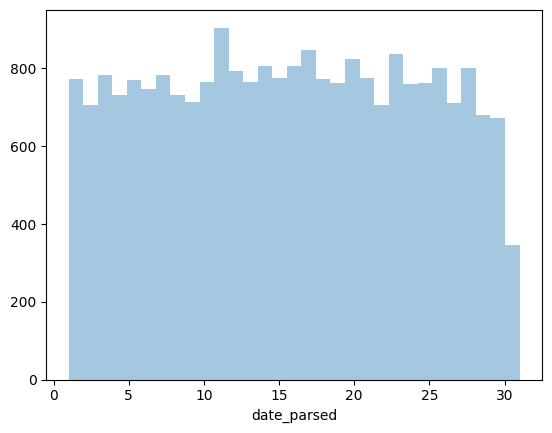

In [28]:
#plotting days of eaarthquakes
day_of_earthquakes = earthquakes['date_parsed'].dt.day
sns.distplot(day_of_earthquakes,kde = False,bins = 31)